House Prices Dataset Used :
- https://www.kaggle.com/datasets/shibumohapatra/house-price

Loading the Libraries Needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Importing the House Dataset

In [2]:
df = pd.read_csv("./dataset/house_price_dataset.csv")

Checking the Dataset

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

There is 207 NA Values in the Dataset, so these are going to be Dropout

In [8]:
df = df.dropna()

Now There is Not NA or Null Values in the Dataset

<Axes: >

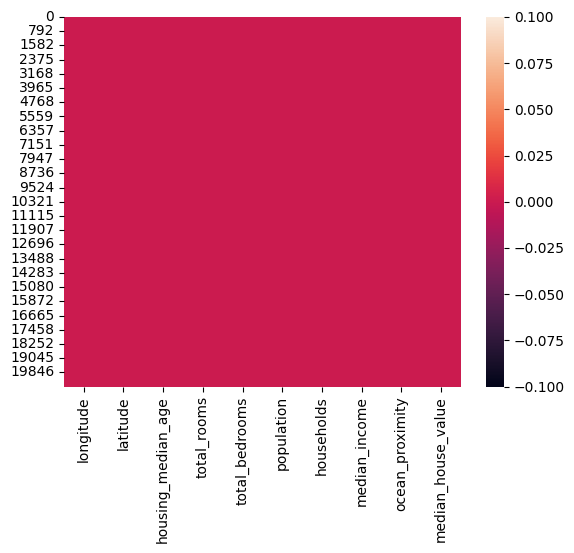

In [9]:
sns.heatmap(df.isnull())

<Axes: >

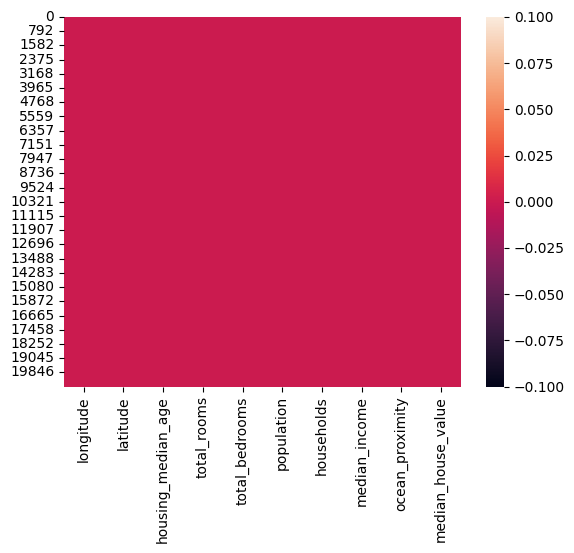

In [10]:
sns.heatmap(df.isna())

<Axes: >

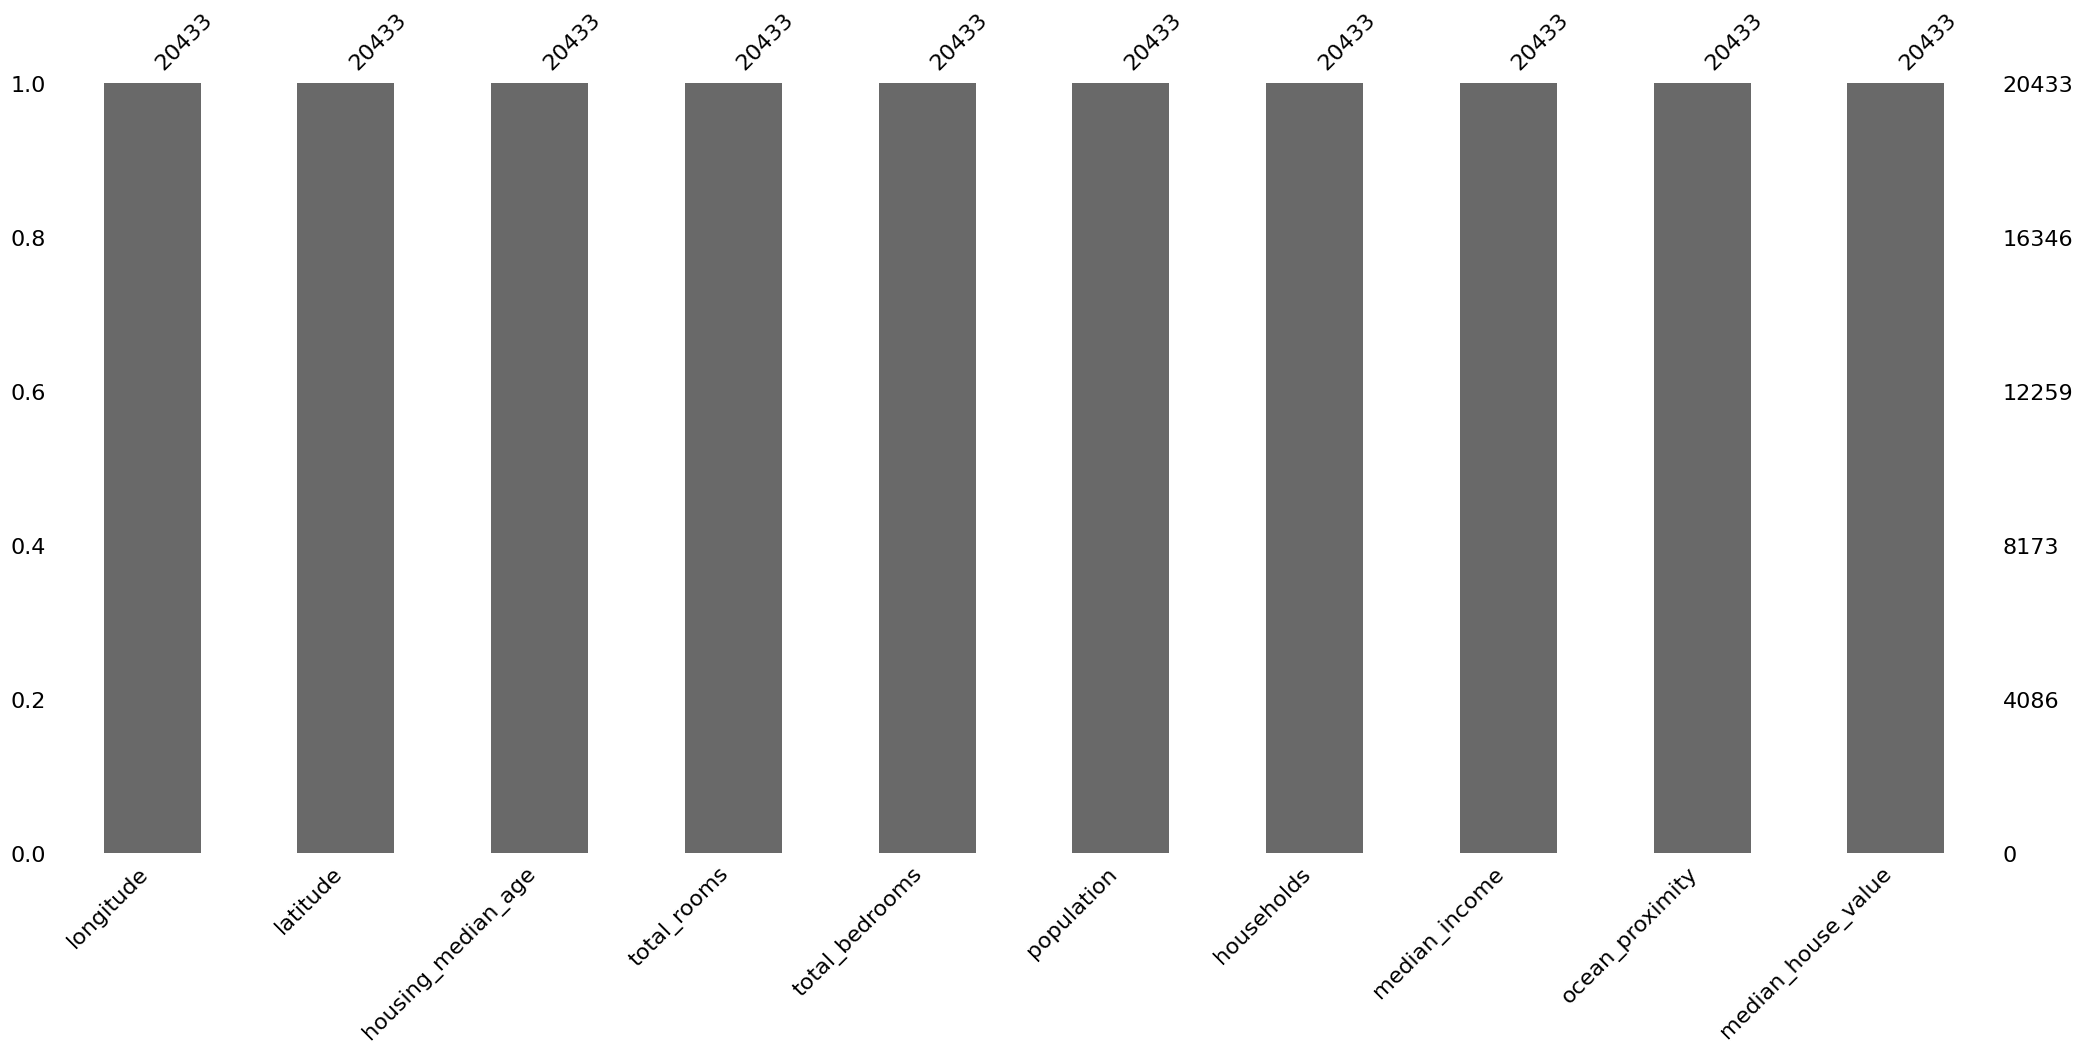

In [11]:
msno.bar(df)

Heatmap of the Dataset

C:\Users\mende\AppData\Local\Temp\ipykernel_16260\925707079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


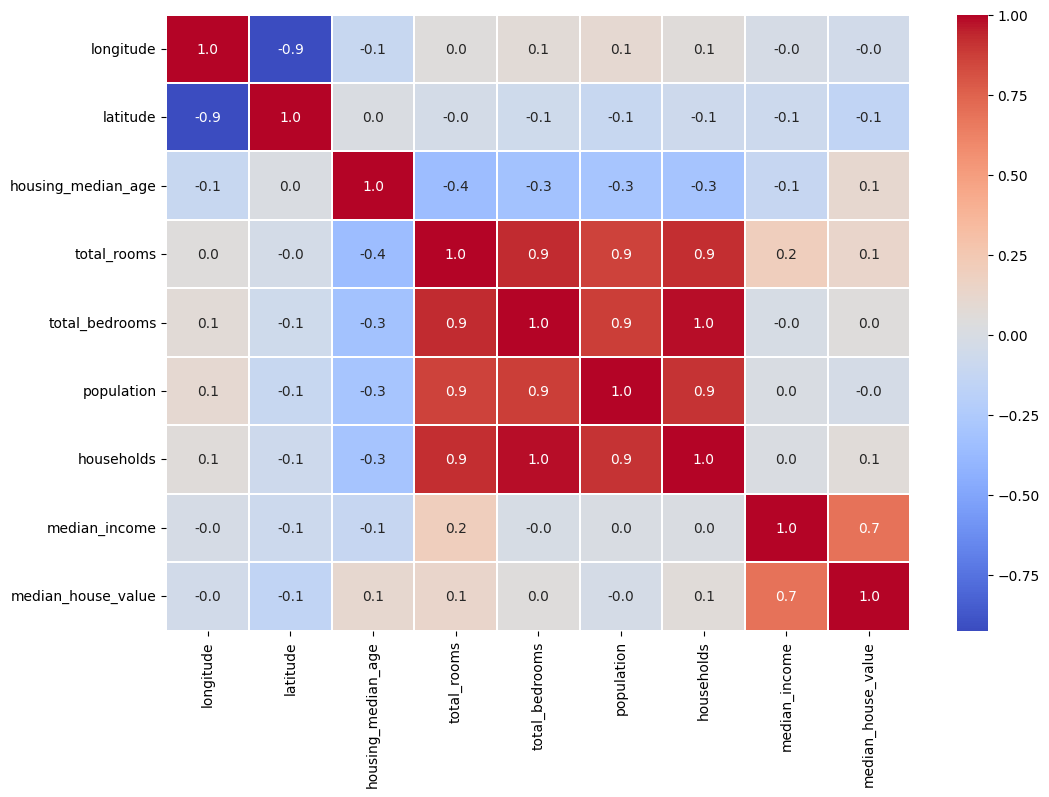

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [13]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Applying One Hot Encoding to the ocean_proximity Column

In [14]:
X = pd.get_dummies(X)

Splitting the Data to Train and Test Datasets, and then Each X Feature is going to be Scaled

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Importing the RandomForestRegressor Algorithm and Testing what is the best number of estimators

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
def get_score(n_estimators) :
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=100)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)

    return MAE.mean()

In [21]:
random_forest_tree_numbers = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

results = {}

for i in random_forest_tree_numbers :
    result = get_score(i)
    results[i] = result

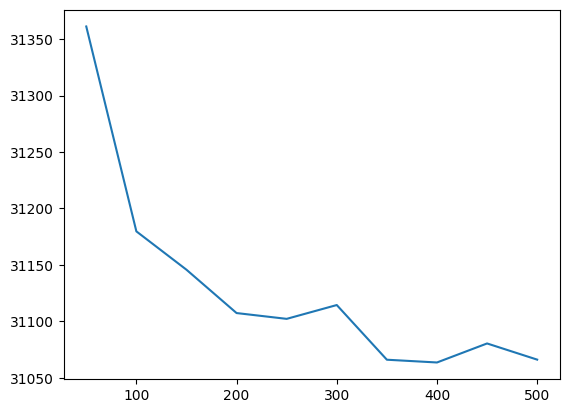

In [22]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

The Best number of estimators of the RandomForestRegressor is 400, so this is the model that is going to be trained with that parameter.

In [23]:
best_random_forest = RandomForestRegressor(n_estimators=400, random_state=100)

best_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=100)

RandomForestRegressor Validation Results

In [24]:
y_pred = best_random_forest.predict(X_test)

print("Test Score:" + str(best_random_forest.score(X_test, y_test)))

MAE = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

Test Score:0.8218643192920911
MAE: 31063.545423293373
R2 Score: 0.8218643192920911


Importing XGBRegressor Algorithm

In [25]:
from xgboost import XGBRegressor

In [26]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

In [27]:
xgb_model.fit(X_train, y_train, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor Validation Results

In [28]:
predictions = xgb_model.predict(X_test)

print("Test Score: " + str(xgb_model.score(X_test, y_test)))

print("MAE: " + str(mean_absolute_error(y_test, predictions)))

print("R2 Score: " + str(r2_score(y_test, predictions)))

Test Score: 0.8430665064868227
MAE: 29632.232718642954
R2 Score: 0.8430665064868227


Text(0.5, 1.0, 'Evaluation of the XGBRegressor Model')

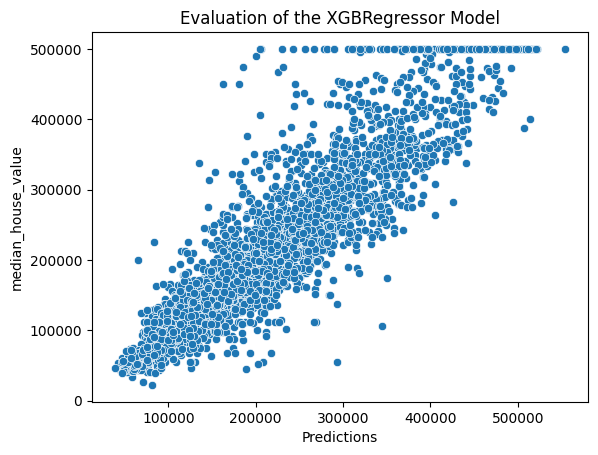

In [41]:
sns.scatterplot(x=predictions,y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of the XGBRegressor Model")

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [31]:
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))
print("Mean Squared Error", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error 29632.232718642954
Mean Squared Error 1992587493.232319
Root Mean Squared Error 44638.408273955276


In [32]:
residuals = y_test - predictions

In [33]:
residuals

16471   -25590.867188
17372   -13284.453125
18680    67675.140625
12959   -22508.664062
6210      4875.578125
             ...     
6907     17402.390625
2085     -8894.992188
15326     7185.203125
17935   -16240.687500
9329    -73222.140625
Name: median_house_value, Length: 4087, dtype: float64

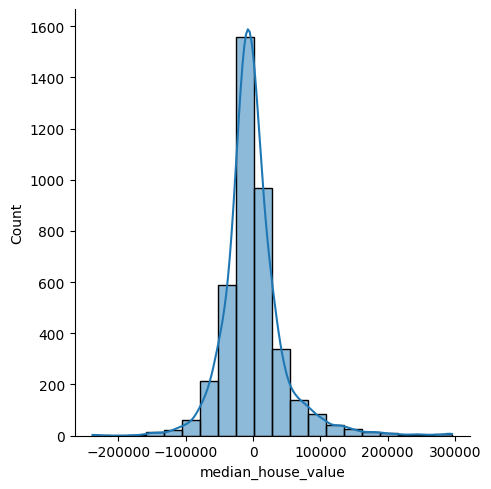

In [34]:
sns.displot(residuals, bins = 20, kde = True)

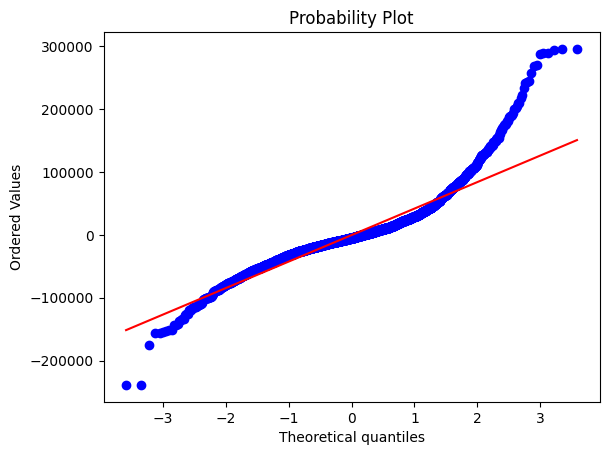

In [35]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Importing LinearRegression Algorithm

In [36]:
from sklearn.linear_model import LinearRegression

LinearRegression Validation Results

In [37]:
simple_model = LinearRegression()

simple_model.fit(X_train, y_train)

y_pred = simple_model.predict(X_test)

print("Test Score:" + str(simple_model.score(X_test, y_test)))

MAE = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(MAE))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

Test Score:0.6462566893888948
MAE: 48501.195971971596
R2 Score: 0.6462566893888948


The XGBRegressor did the best results, with an accuracy of 84%, so this Model is going to be saved with also the Scaler

In [38]:
import pickle as pkl

In [39]:
pkl.dump(scaler, open(f"./model/scaler.pkl", "wb"))

In [40]:
pkl.dump(xgb_model, open(f"./model/house_price_model.pkl", "wb"))